 # Dry Bean Classification 
    Mini Project 1

- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both 
marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending **ONLY** on dimension and shape features of bean varieties with no external discriminatory features.

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

In [51]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt


#from plotnine import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures


from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

## Reading the dataset

In [2]:
beanset = pd.read_csv('dataset/train_dry.csv',index_col='ID')
beanset

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                        
0      58238    971.303       397.202654       186.945510      2.124697   
1      44515    757.601       265.590470       213.967453      1.241266   
2      31662    653.783       239.902428       168.421505      1.424417   
3      38778    734.020       268.446281       184.061923      1.458456   
4      42530    775.403       281.212824       193.236878      1.455275   
...      ...        ...              ...              ...           ...   
10829  37777    716.007       250.174662       192.704033      1.298233   
10830  32187    667.621       247.778775       165.786862      1.494562   
10831  81837   1095.937       433.838186       241.527026      1.796230   
10832  48212    826.362       309.639462       199.285811      1.553746   
10833  28026    610.943       215.446569       165.740377      1.299904   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                              
0          0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1          0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2          0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3          0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4          0.726511       43028     232.703412  0.729816  0.988426   0.888895   
...             ...         ...            ...       ...       ...        ...   
10829      0.637708       38174     219.315230  0.770519  0.989600   0.925983   
10830      0.743179       32582     202.439525  0.731805  0.987877   0.907466   
10831      0.830699       82554     322.797312  0.771996  0.991315   0.856226   
10832      0.765357       48777     247.760822  0.677002  0.988417   0.887206   
10833      0.638903       28302     188.901592  0.776688  0.990248   0.943560   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                           
0         0.685561      0.006820      0.000929      0.469994      0.998595   
1         0.896387      0.005966      0.002376      0.803510      0.997370   
2         0.836931      0.007577      0.002293      0.700453      0.997737   
3         0.827733      0.006923      0.002005      0.685142      0.999250   
4         0.827499      0.006612      0.001912      0.684755      0.996507   
...            ...           ...           ...           ...           ...   
10829     0.876648      0.006622      0.002413      0.768513      0.997708   
10830     0.817017      0.007698      0.002116      0.667517      0.997646   
10831     0.744050      0.005301      0.001002      0.553610      0.994412   
10832     0.800159      0.006422      0.001624      0.640255      0.994793   
10833     0.876791      0.007687      0.002802      0.768762      0.999317   

              y  
ID               
0         HOROZ  
1         SEKER  
2      DERMASON  
3      DERMASON  
4          SIRA  
...         ...  
10829     SEKER  
10830  DERMASON  
10831      CALI  
10832      SIRA  
10833  DERMASON  

[10834 rows x 17 columns]

In [5]:
beanset['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

### Get Data Summary

In [6]:
beanset.describe(percentiles=[.25, .5, .75, 0.995]).T

count          mean           std           min  \
Area             10834.0  53095.675189  29542.542580  20420.000000   
Perimeter        10834.0    855.274892    214.991122    524.932000   
MajorAxisLength  10834.0    320.036169     85.961630    183.601165   
MinorAxisLength  10834.0    202.410342     45.113965    129.576207   
AspectRation     10834.0      1.581294      0.244314      1.024868   
Eccentricity     10834.0      0.750588      0.091481      0.218951   
ConvexArea       10834.0  53816.205926  29999.710739  20684.000000   
EquivDiameter    10834.0    253.123583     59.433080    161.243764   
Extent           10834.0      0.749937      0.048949      0.555315   
Solidity         10834.0      0.987152      0.004626      0.919246   
roundness        10834.0      0.873647      0.059344      0.489618   
Compactness      10834.0      0.800244      0.061228      0.645368   
ShapeFactor1     10834.0      0.006559      0.001127      0.002856   
ShapeFactor2     10834.0      0.001718      0.000593      0.000564   
ShapeFactor3     10834.0      0.644139      0.098268      0.416499   
ShapeFactor4     10834.0      0.995083      0.004306      0.947687   

                          25%           50%           75%          99.5%  \
Area             36343.500000  44645.000000  61295.000000  200705.420000   
Perimeter          703.601250    793.739500    975.517500    1716.551280   
MajorAxisLength    253.501071    296.377365    376.068399     653.014248   
MinorAxisLength    175.927024    192.525040    217.315195     400.636925   
AspectRation         1.432985      1.550761      1.703029       2.248644   
Eccentricity         0.716250      0.764314      0.809450       0.895673   
ConvexArea       36731.250000  45148.000000  62251.500000  203320.565000   
EquivDiameter      215.113880    238.419335    279.362162     505.515655   
Extent               0.718778      0.760141      0.786871       0.830903   
Solidity             0.985627      0.988290      0.990014       0.993309   
roundness            0.833479      0.883472      0.916883       0.976425   
Compactness          0.763378      0.801428      0.834068       0.945243   
ShapeFactor1         0.005888      0.006643      0.007268       0.009040   
ShapeFactor2         0.001161      0.001700      0.002169       0.003155   
ShapeFactor3         0.582747      0.642287      0.695670       0.893485   
ShapeFactor4         0.993690      0.996397      0.997895       0.999460   

                           max  
Area             254616.000000  
Perimeter          1985.370000  
MajorAxisLength     738.860153  
MinorAxisLength     450.926187  
AspectRation          2.388873  
Eccentricity          0.908167  
ConvexArea       263261.000000  
EquivDiameter       569.374358  
Extent                0.866195  
Solidity              0.994677  
roundness             0.990685  
Compactness           0.987303  
ShapeFactor1          0.009897  
ShapeFactor2          0.003665  
ShapeFactor3          0.974767  
ShapeFactor4          0.999733

### Checking for duplicates

In [7]:
beanset.duplicated(subset=None, keep='first').sum()

0

# EDA 
SHOWING DATA USING DIFFERENT TYPE OF PLOT

**1- Count and distribution of all beans categories:**

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64


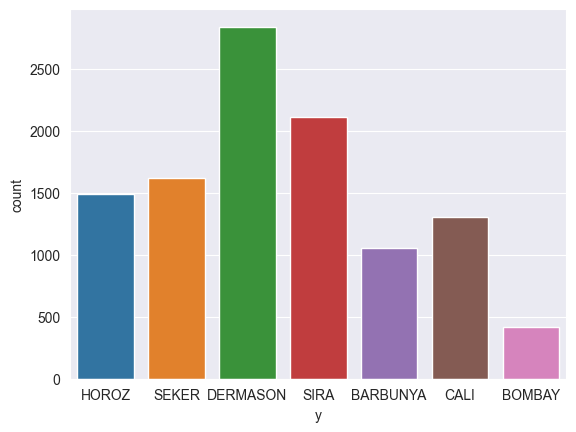

In [8]:
print(beanset['y'].value_counts())
_ = sns.countplot(x='y', data=beanset)

- We can notice that there is a slight imbalance in the data we need to handle.

**2- Distribution of numerical features:**

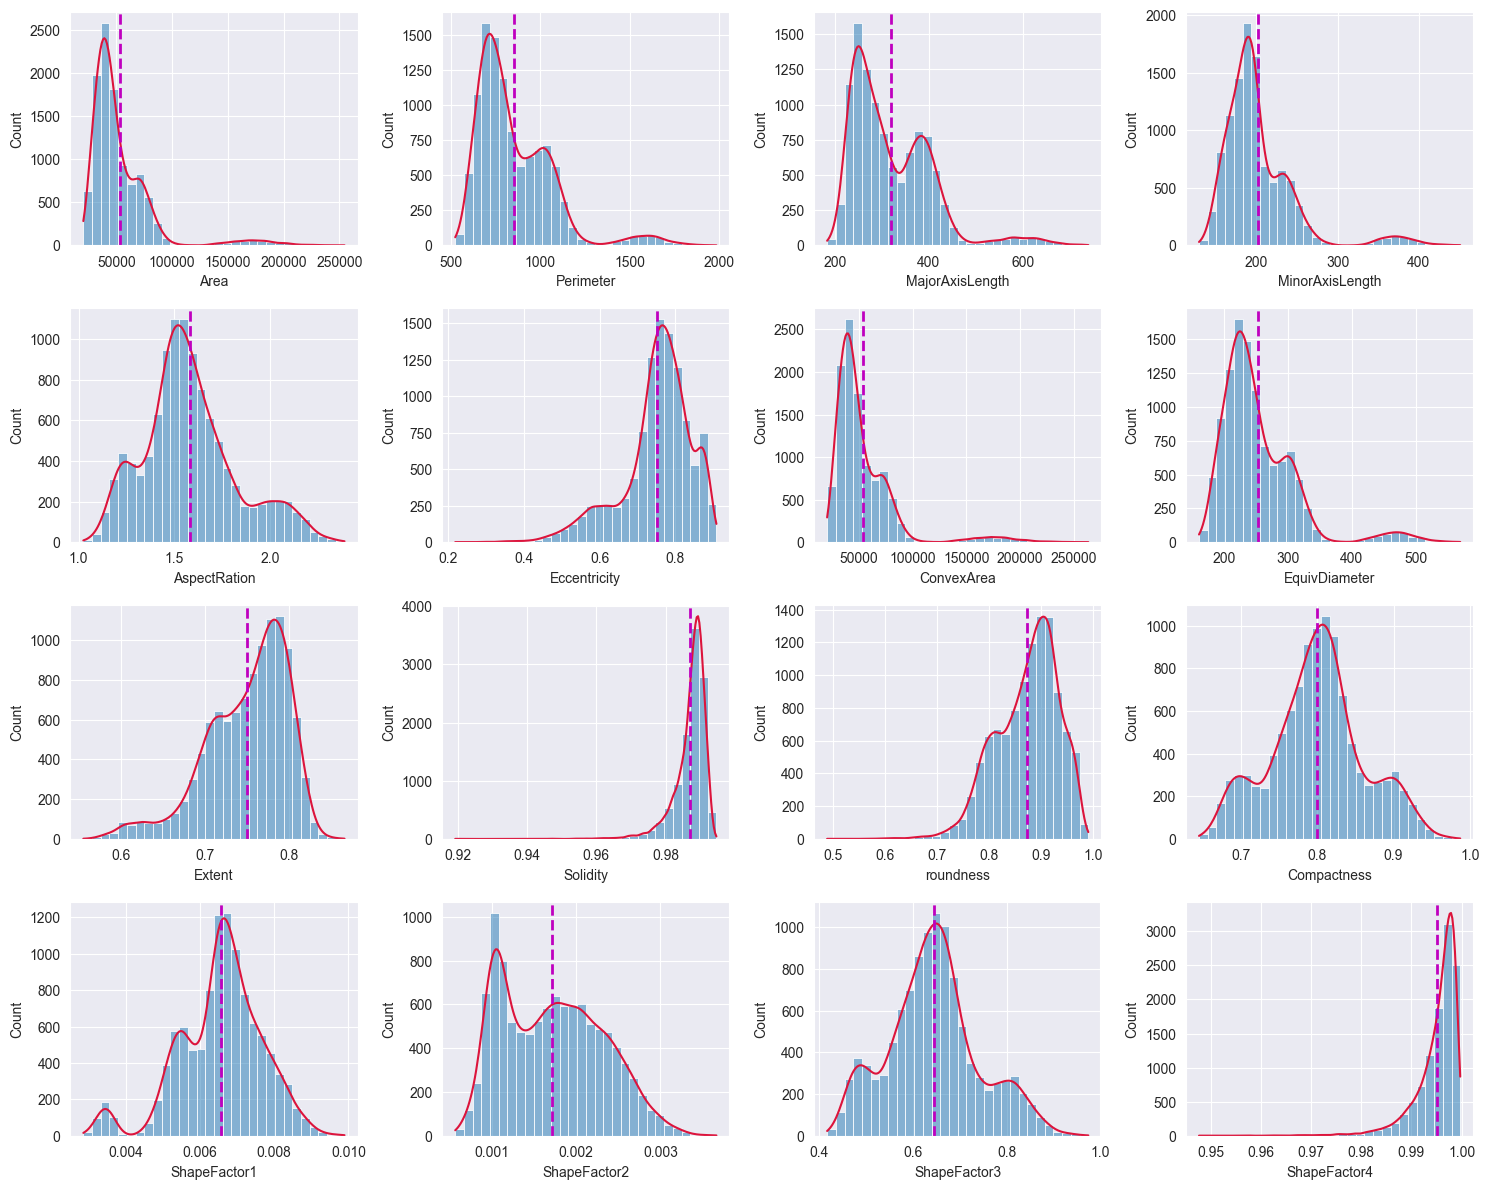

In [9]:
Numeric_cols = beanset.drop(columns=['y']).columns

fig, ax = plt.subplots(4, 4, figsize=(15,12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(beanset[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=beanset[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

- Some distributions have long tails and most are **bi-modal** which means that some bean classes should be quite distinct from others. 

**3- Boxplot of numerical features for each type of bean:**

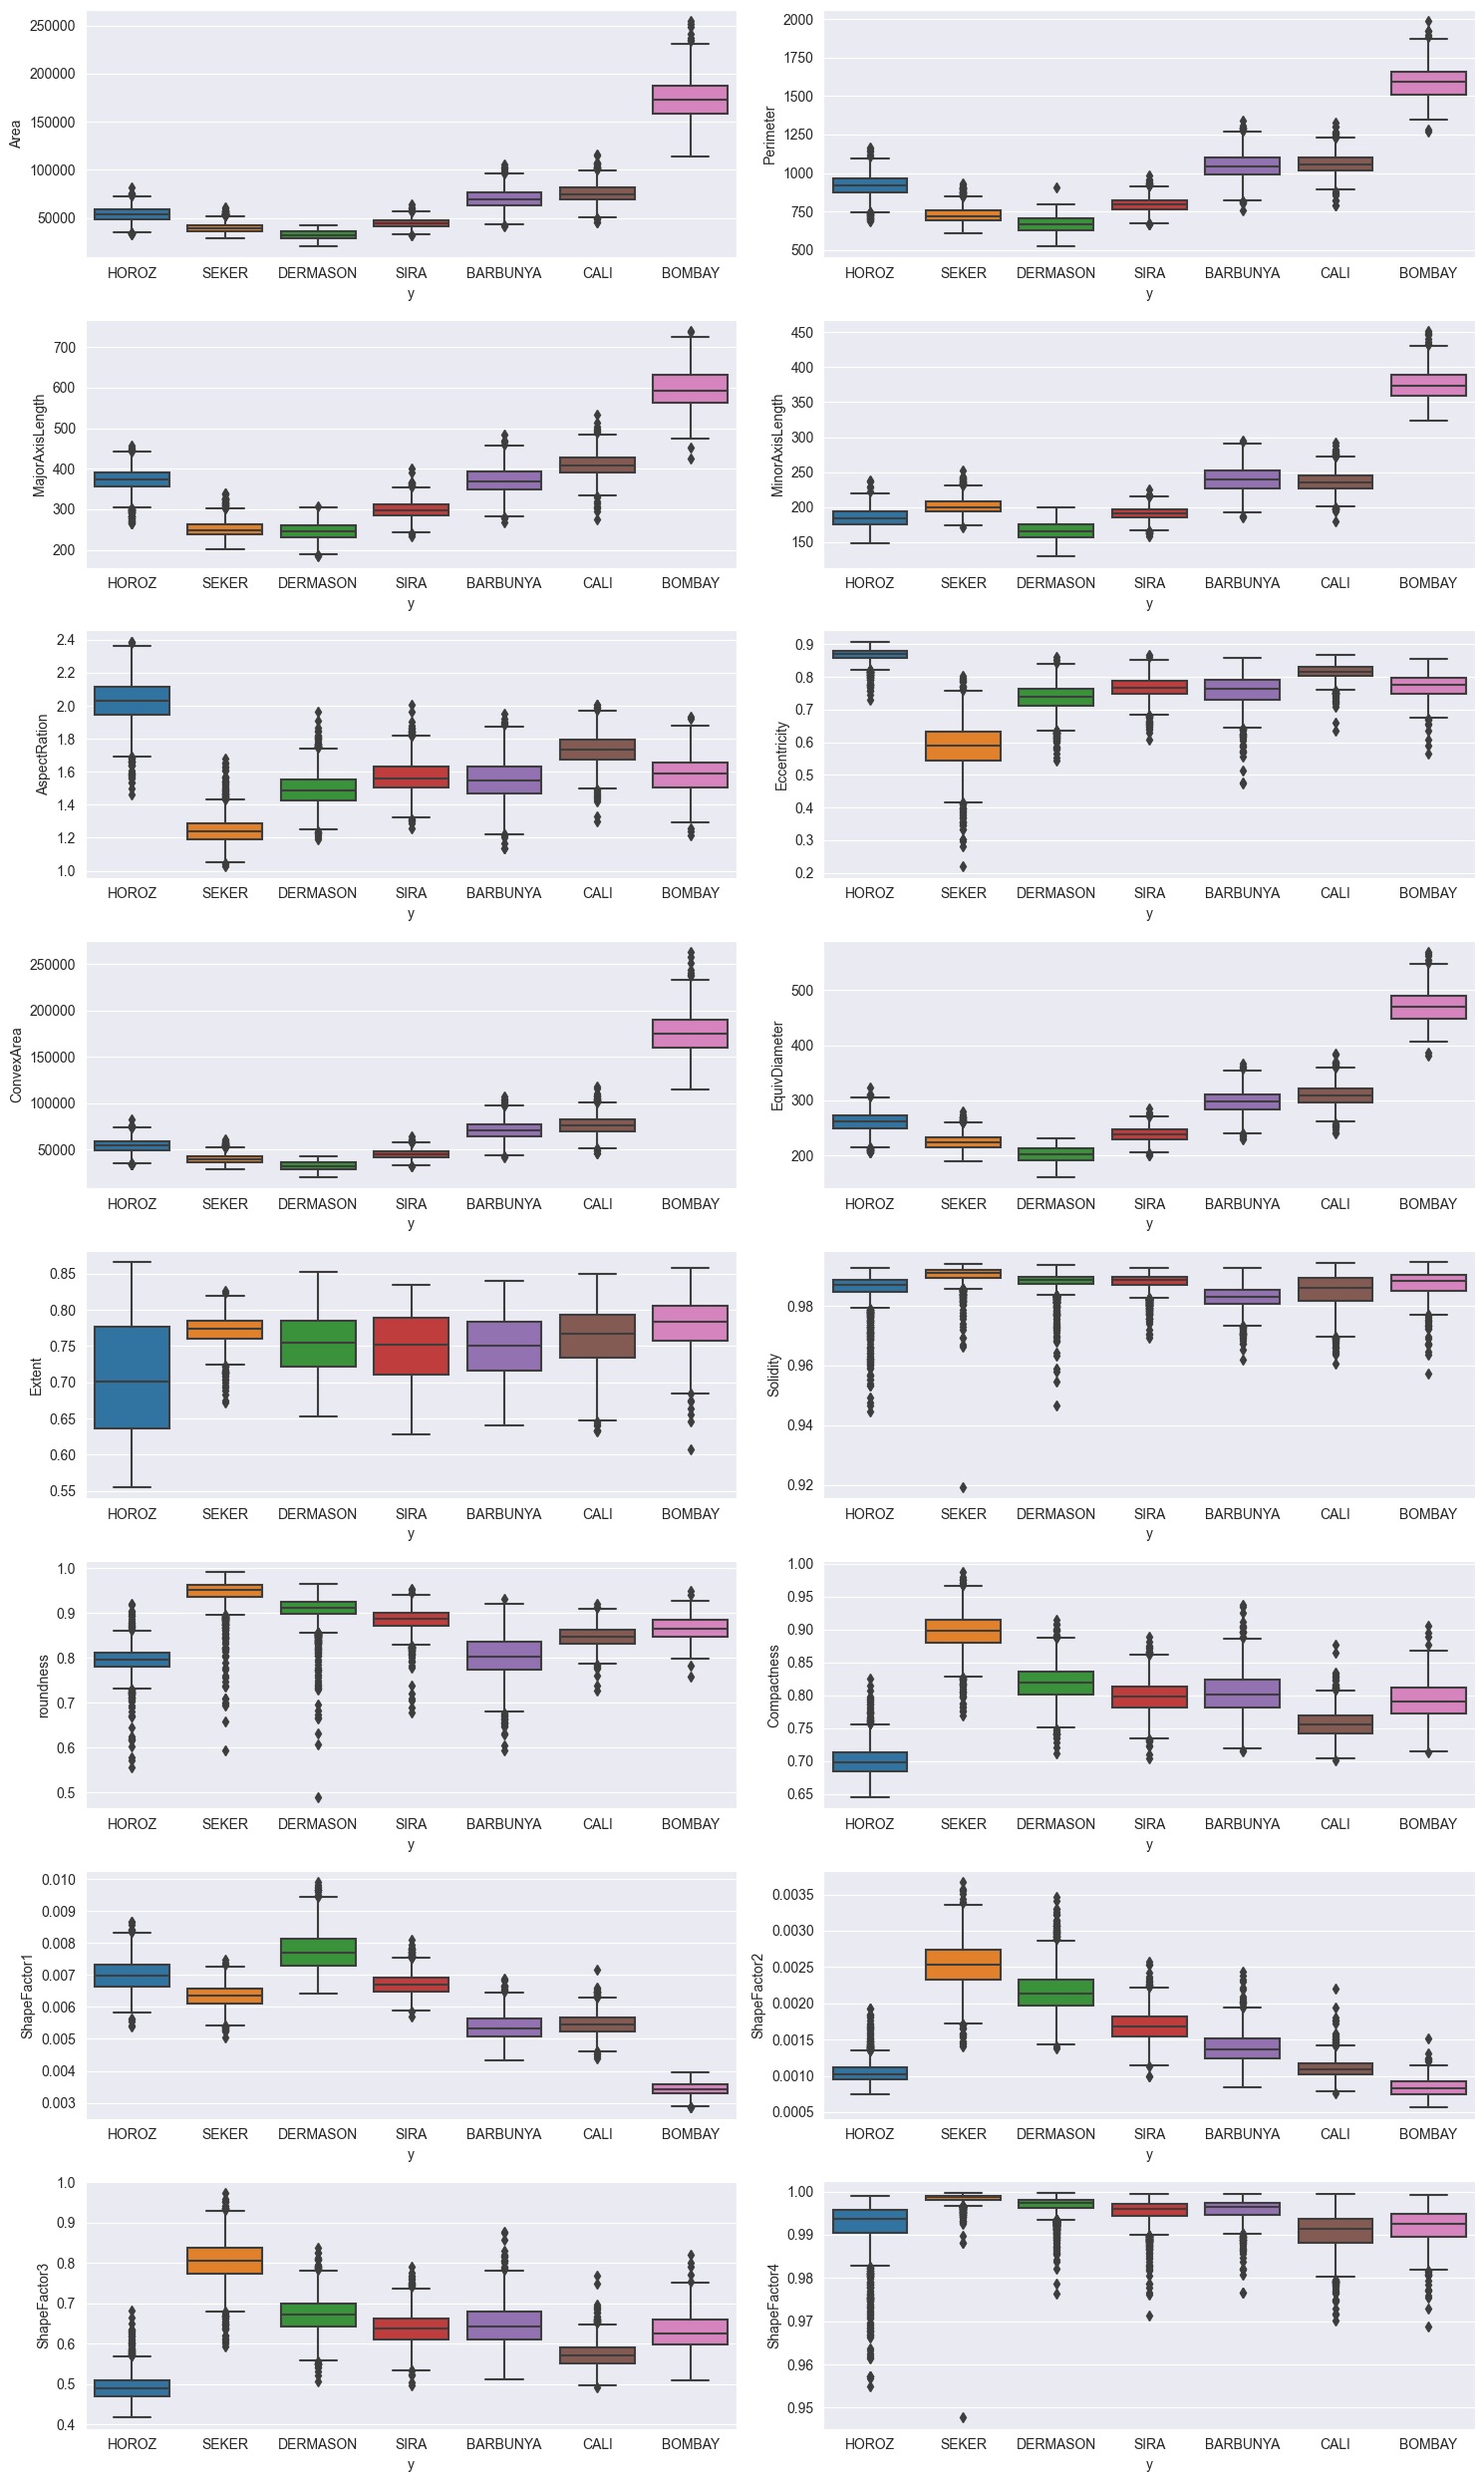

In [10]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=beanset['y'], y= beanset[variable], ax=subplot)
plt.tight_layout()

- We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.

In [14]:
clm=beanset.columns
clm

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [15]:
beanset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

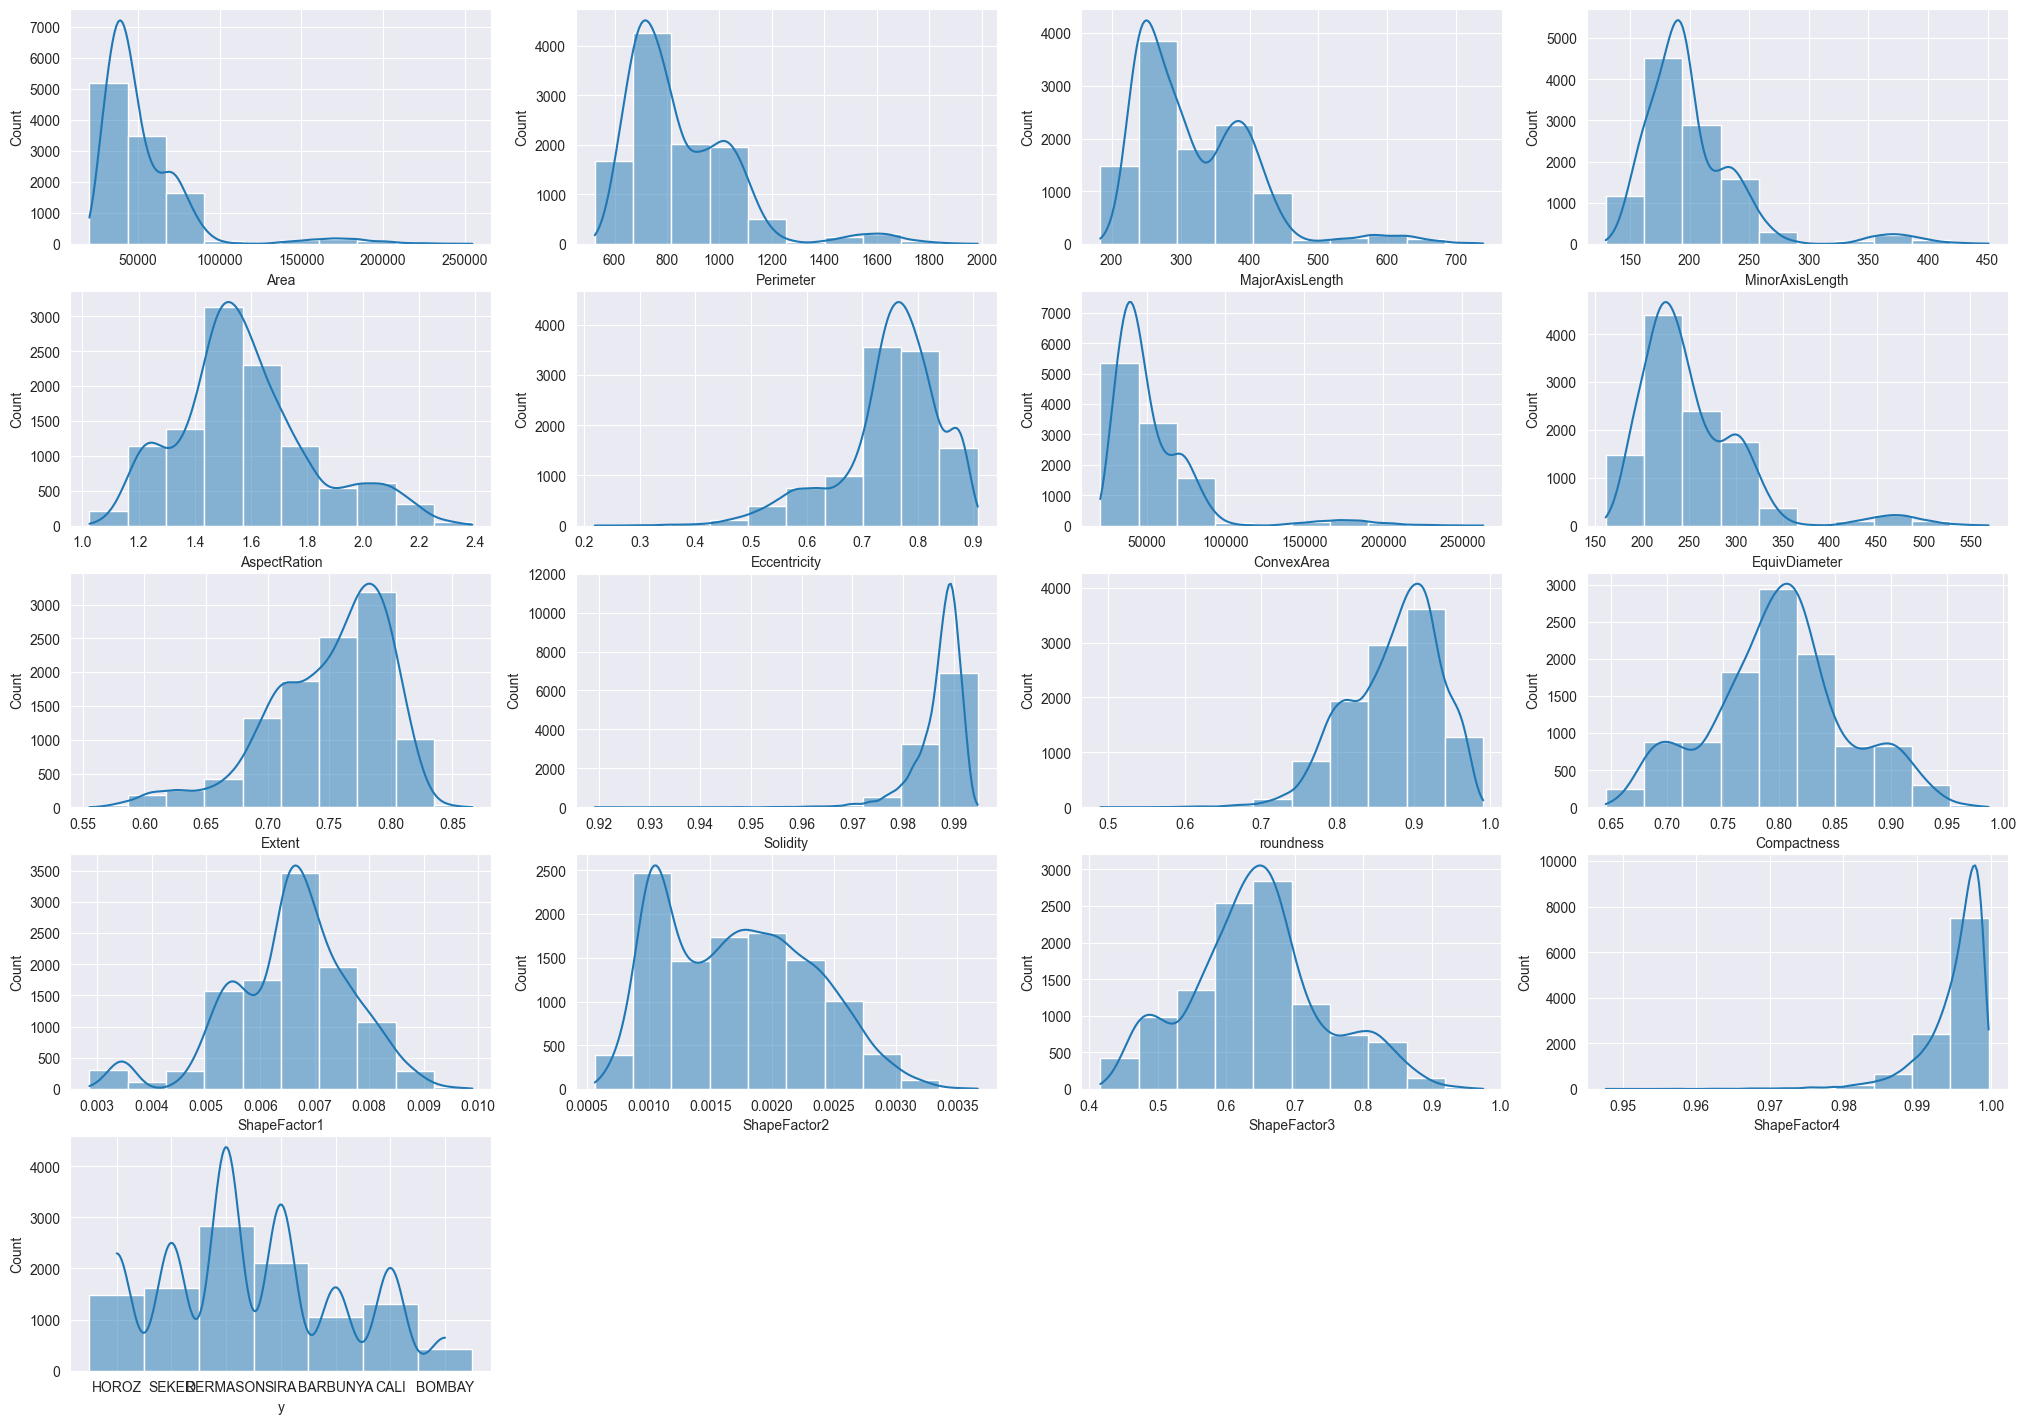

In [18]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(beanset.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(beanset[col], kde=True, bins=10)

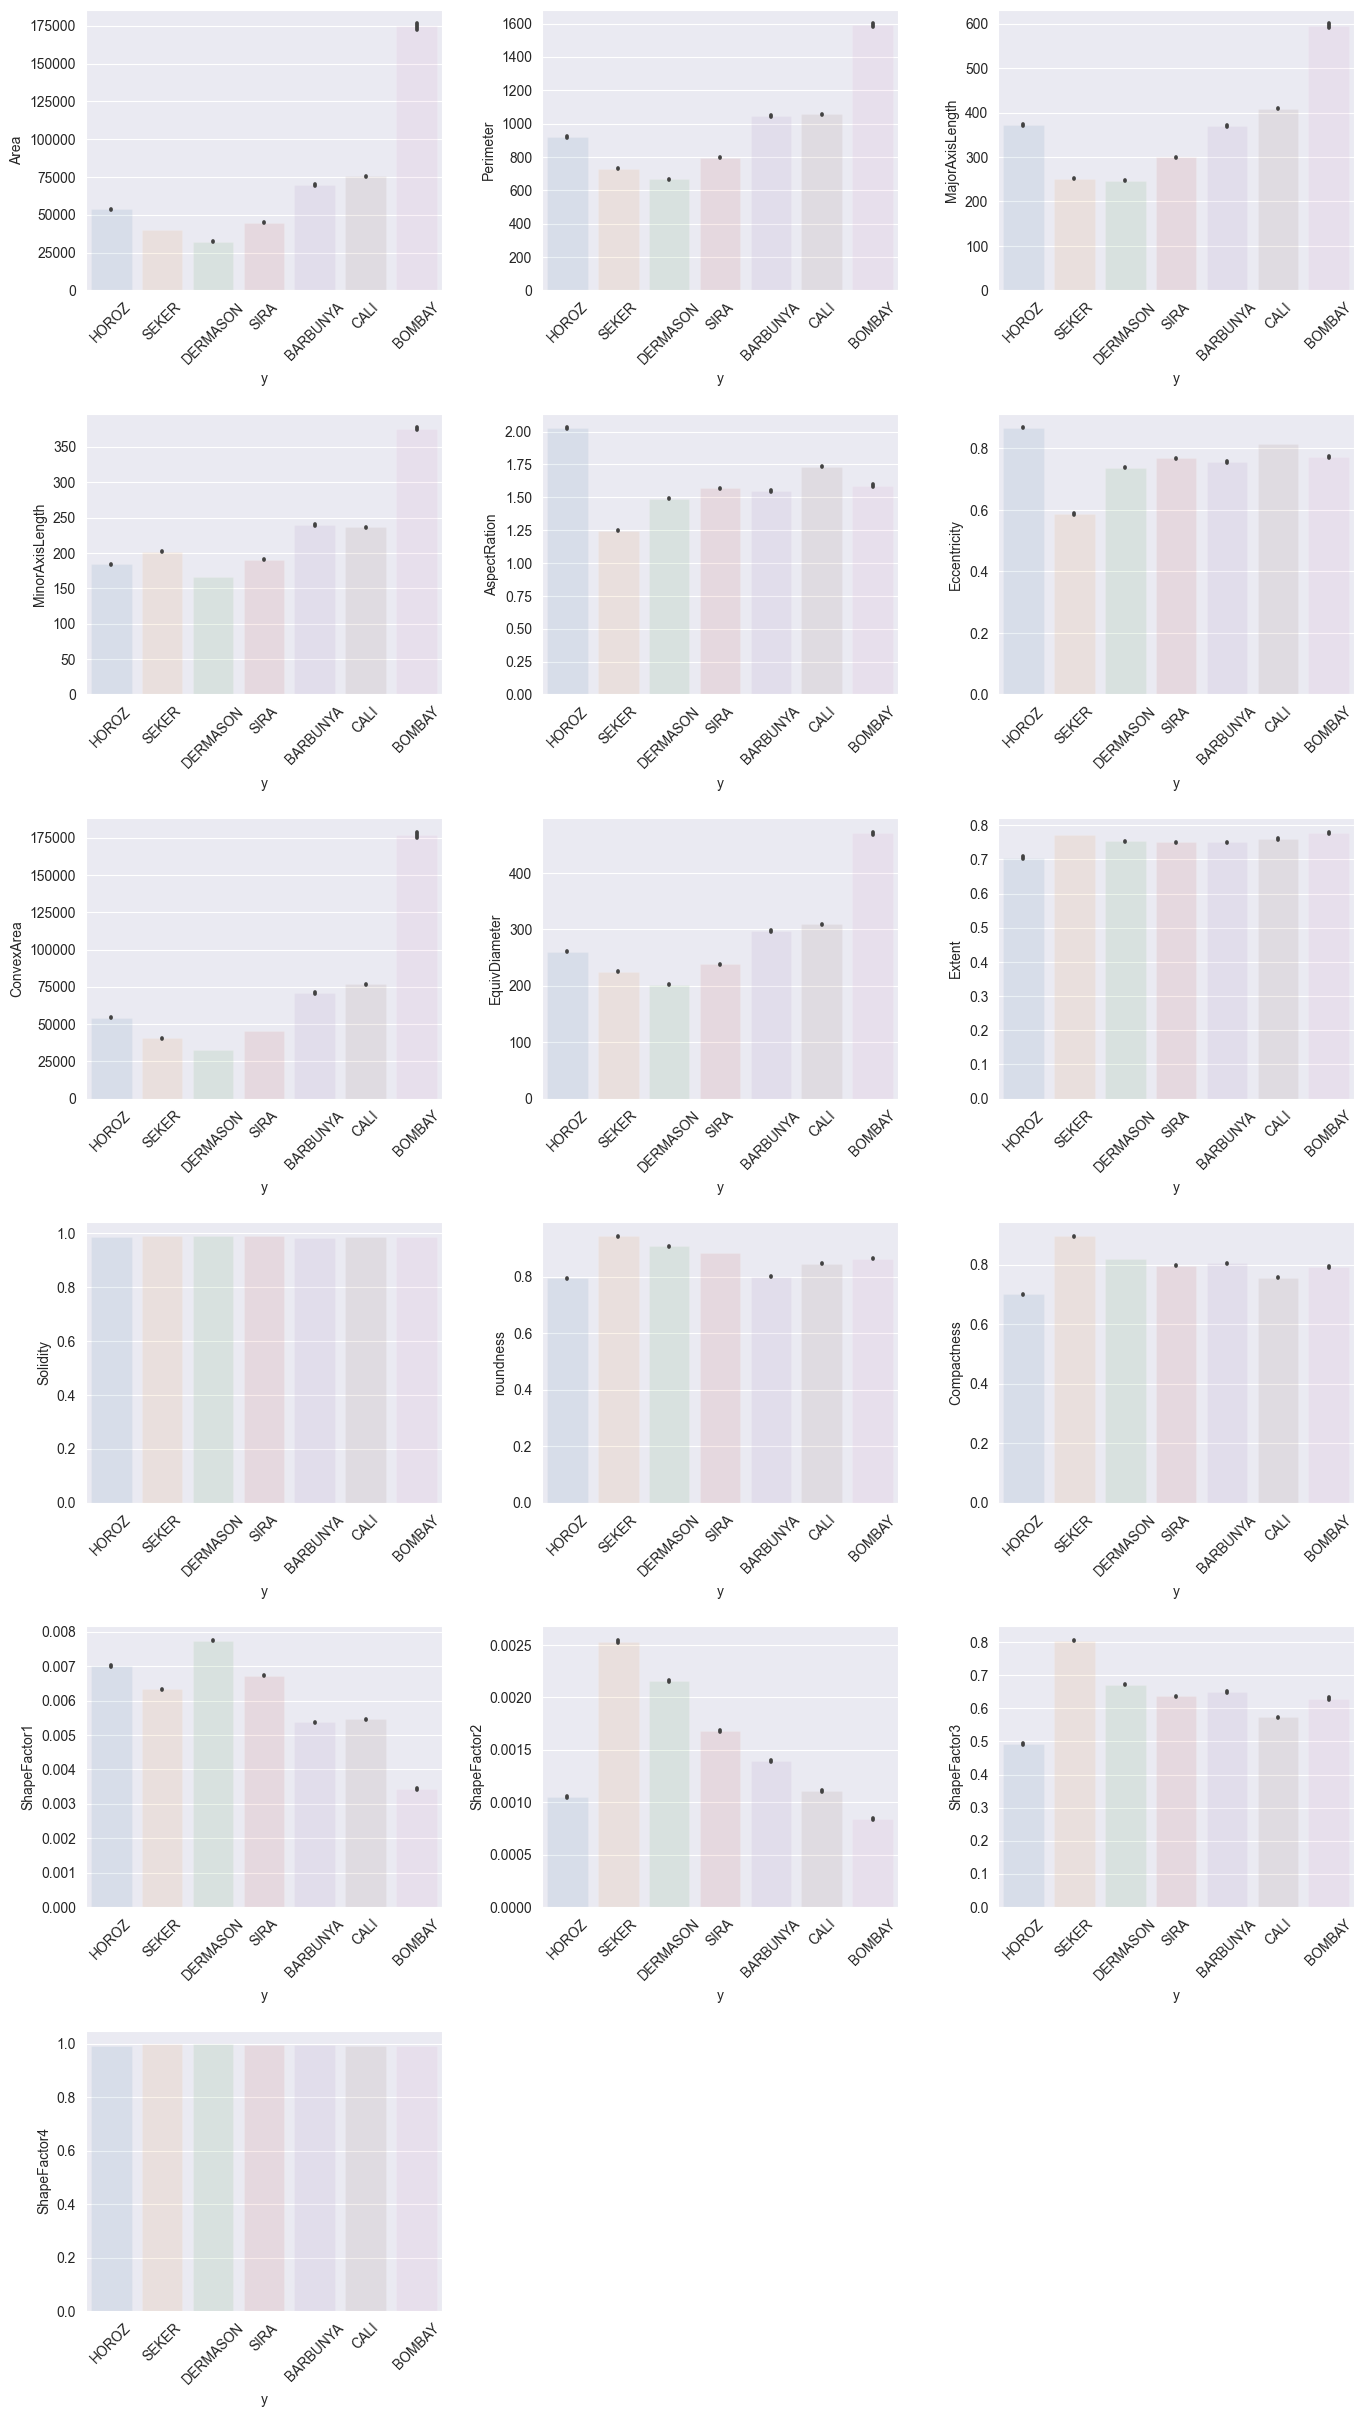

In [21]:
def plot_subplots(subplots, plot, n=3):
    m = len(subplots)
    height = (m//n + (m%n != 0)) * 4
    plt.figure(figsize=(14, height))
    for i, c in enumerate(subplots):
        plt.subplot(m//n + min(1, m%n), n, i+1)
        plot(c)
        plt.tight_layout(pad=2.0)
        plt.xticks(rotation=45)
        
num_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
           'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
           'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
           'ShapeFactor3', 'ShapeFactor4']

plot_subplots(num_cols, lambda c: sns.barplot(data=beanset, x='y', alpha=0.1, y=c))

In [22]:
beanset.y.mode()

0    DERMASON
Name: y, dtype: object

<AxesSubplot: >

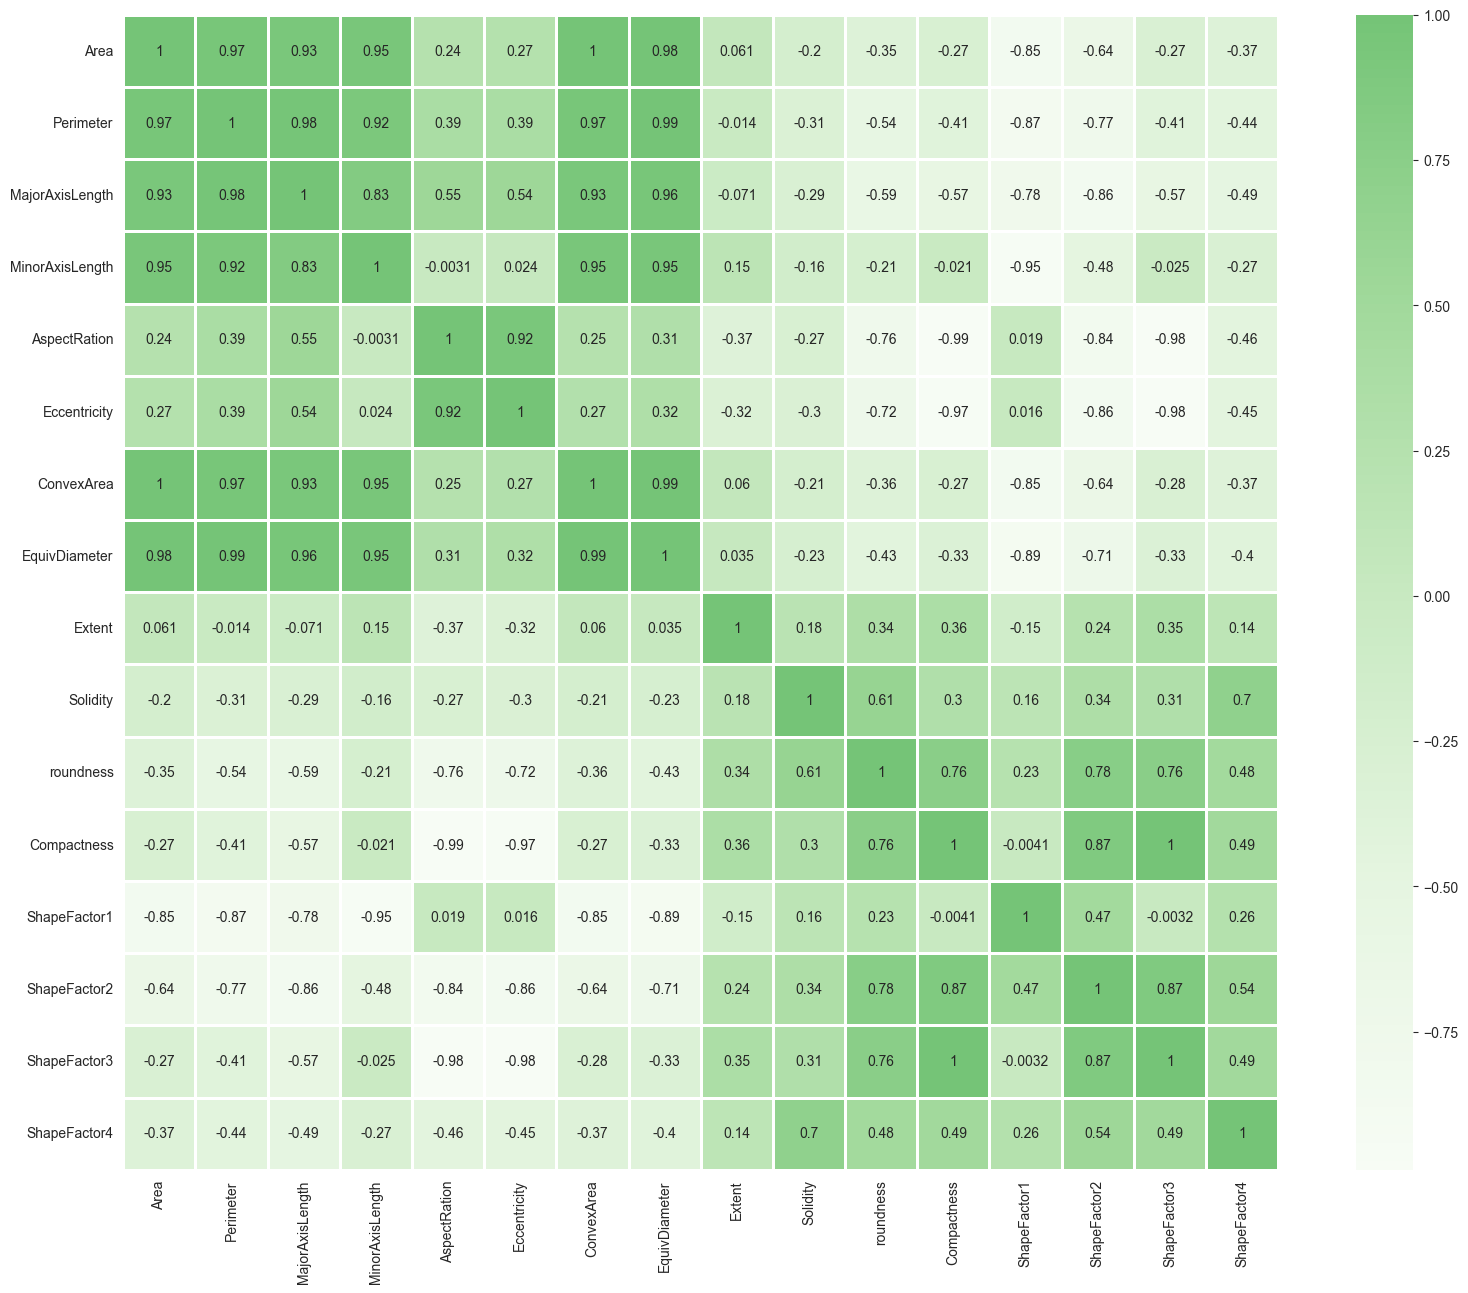

In [23]:
corr = beanset.corr()
f,axes = plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr, square=True, annot = True, linewidth = 1, center = 1, ax = axes, cmap='Greens')

<AxesSubplot: >

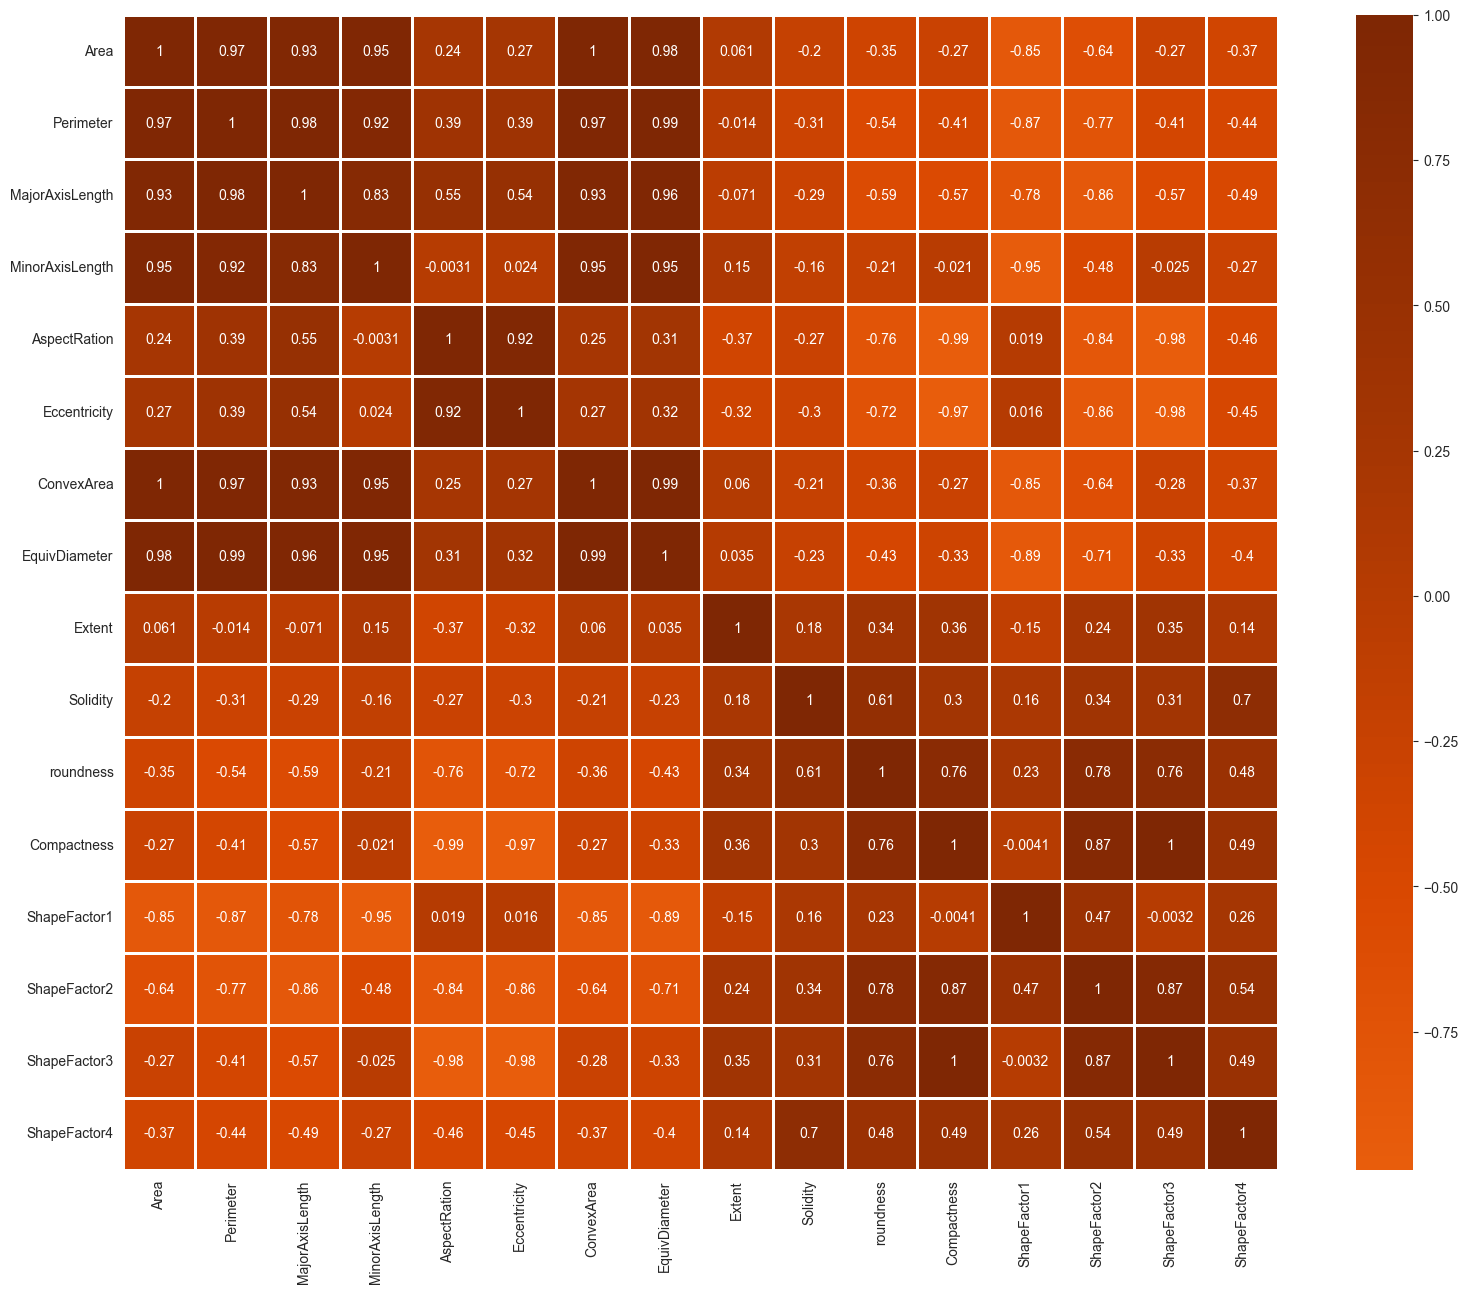

In [24]:
corr = beanset.corr()
f,axes = plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr, square=True, annot = True, linewidth = .8, center = -2, ax = axes, cmap='Oranges')

# spearman corelation

<AxesSubplot: >

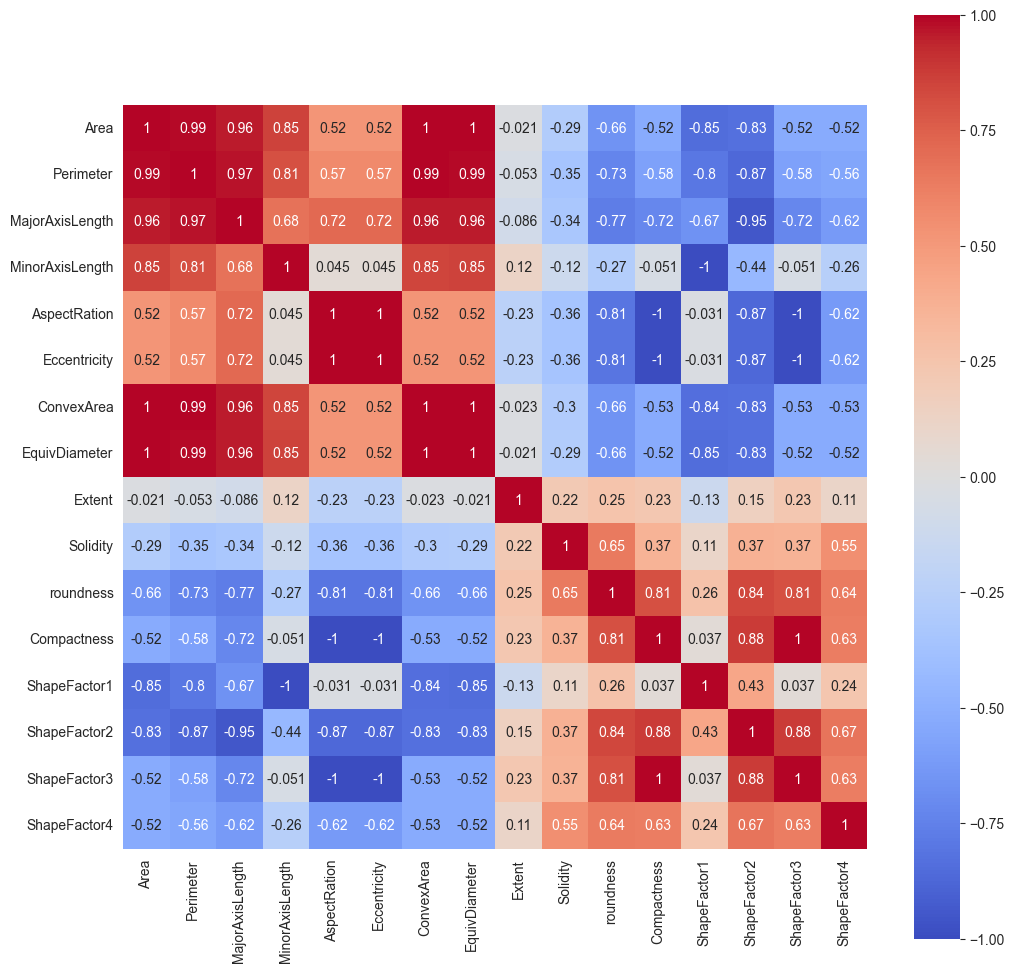

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(beanset.corr("spearman"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

<AxesSubplot: >

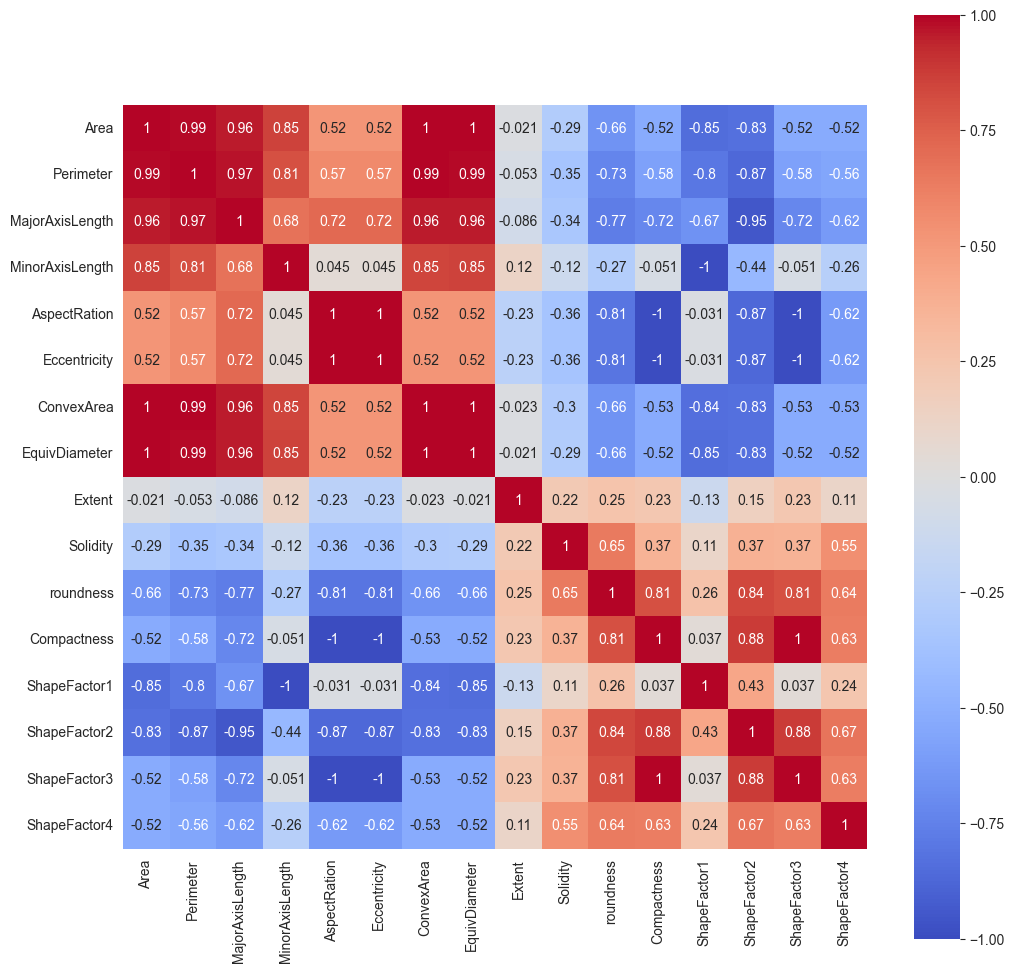

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(beanset.corr("spearman"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


<AxesSubplot: xlabel='y', ylabel='Area'>

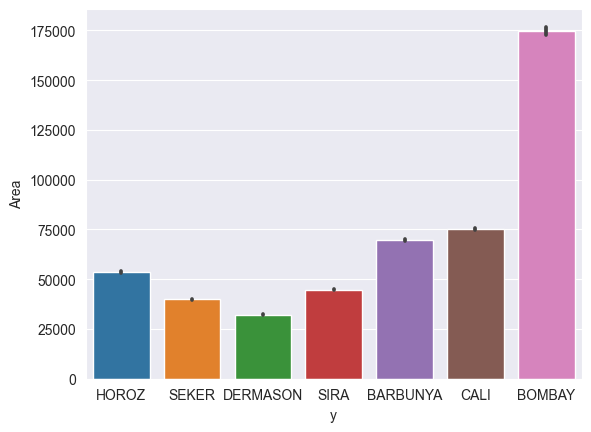

In [27]:
sns.barplot(x='y', y='Area',  data=beanset)

<AxesSubplot: xlabel='Area', ylabel='y'>

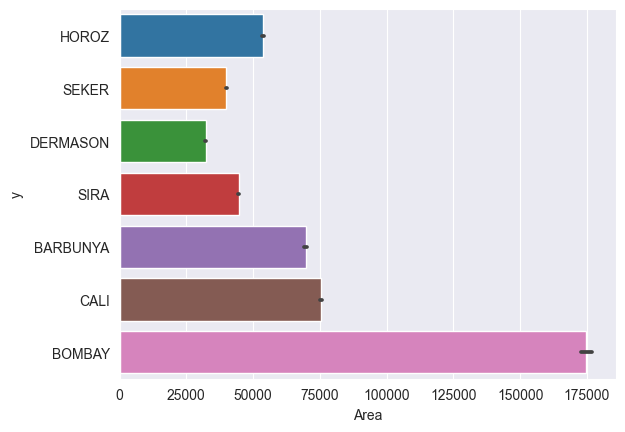

In [28]:
sns.barplot(x='Area', y='y',  data=beanset)

<AxesSubplot: xlabel='y', ylabel='Perimeter'>

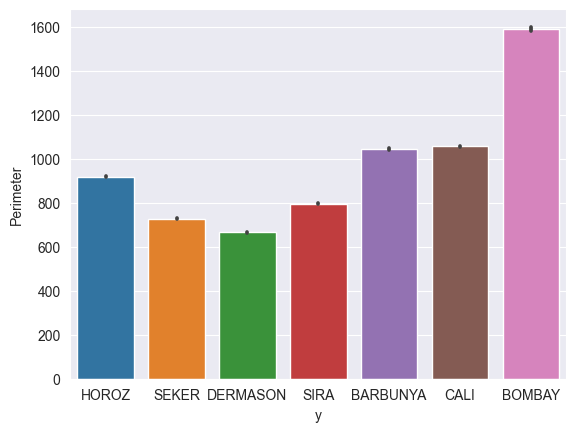

In [29]:
sns.barplot(y='Perimeter', x='y',  data=beanset)

<AxesSubplot: xlabel='y', ylabel='MajorAxisLength'>

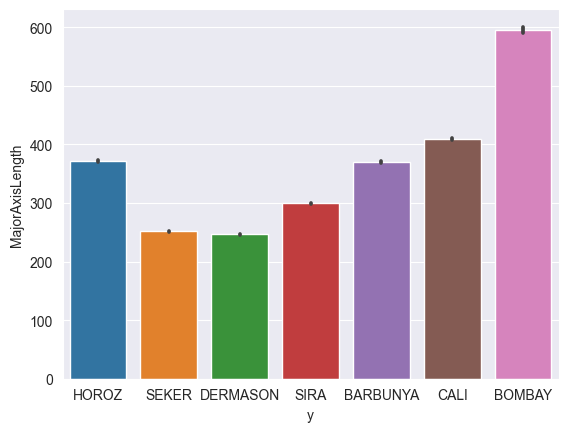

In [30]:
sns.barplot( y='MajorAxisLength',x='y',  data=beanset)



<AxesSubplot: xlabel='y', ylabel='Eccentricity'>

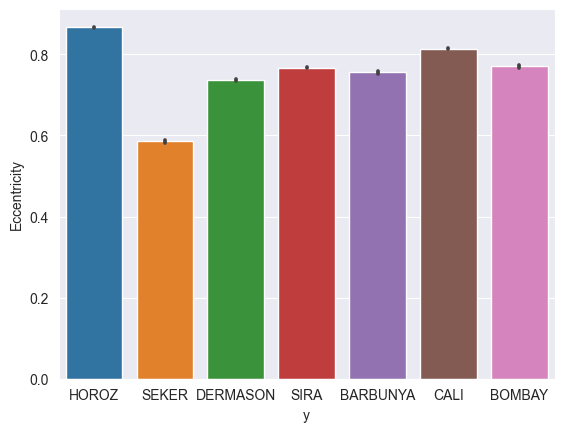

In [31]:
sns.barplot( y= 'Eccentricity',x='y',  data=beanset)


<AxesSubplot: xlabel='y', ylabel='EquivDiameter'>

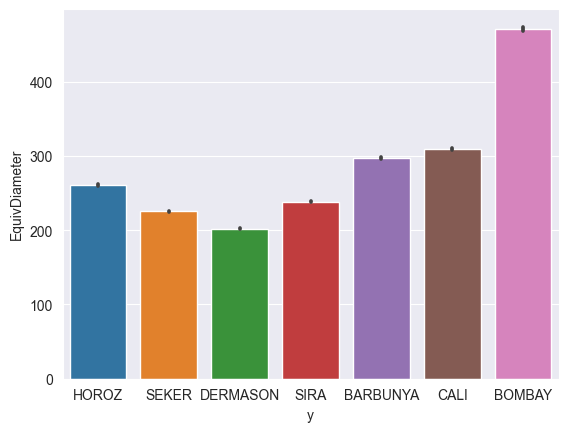

In [32]:
sns.barplot( y= 'EquivDiameter',x='y',  data=beanset)


<AxesSubplot: xlabel='y', ylabel='AspectRation'>

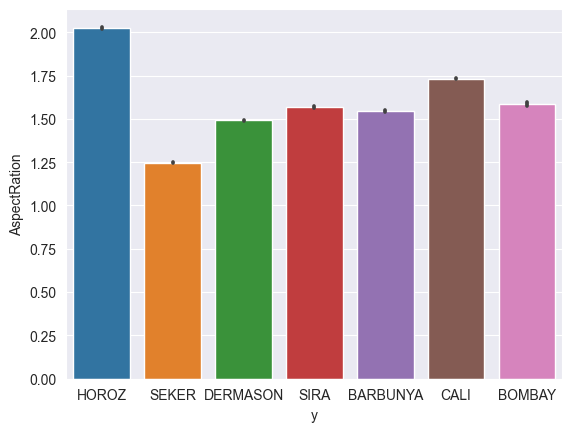

In [33]:
sns.barplot( y= 'AspectRation',x='y',  data=beanset)

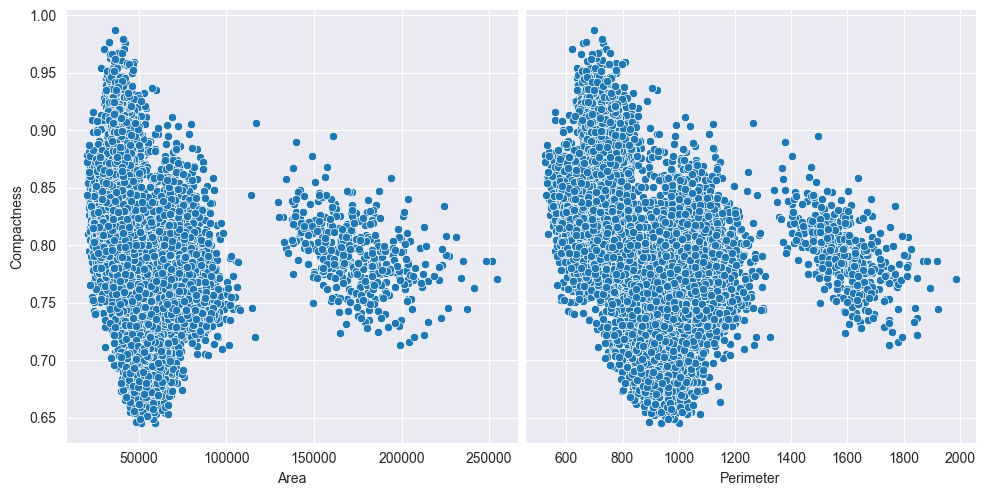

In [34]:
sns.pairplot(beanset, x_vars= [ 'Area','Perimeter' ], y_vars = 'Compactness', size = 5, kind = 'scatter' )
plt.show()

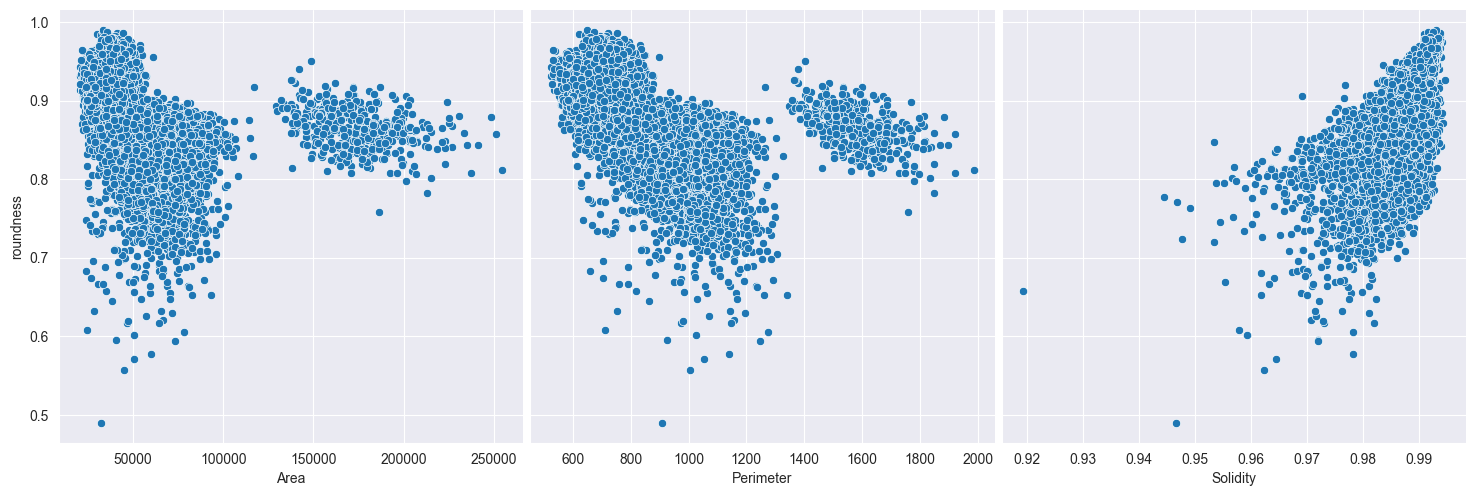

In [35]:
sns.pairplot(beanset, x_vars= [ 'Area','Perimeter','Solidity' ], y_vars = 'roundness', size = 5, kind = 'scatter' )
plt.show()

# KNN

In [36]:
beanset = pd.read_csv('dataset/train_dry.csv',index_col='ID')
beanset.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   
2   31662    653.783       239.902428       168.421505      1.424417   
3   38778    734.020       268.446281       184.061923      1.458456   
4   42530    775.403       281.212824       193.236878      1.455275   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2       0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3       0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4       0.726511       43028     232.703412  0.729816  0.988426   0.888895   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
ID                                                                        
0      0.685561      0.006820      0.000929      0.469994      0.998595   
1      0.896387      0.005966      0.002376      0.803510      0.997370   
2      0.836931      0.007577      0.002293      0.700453      0.997737   
3      0.827733      0.006923      0.002005      0.685142      0.999250   
4      0.827499      0.006612      0.001912      0.684755      0.996507   

           y  
ID            
0      HOROZ  
1      SEKER  
2   DERMASON  
3   DERMASON  
4       SIRA

In [37]:
X = beanset.iloc[:, :-1].values
y = beanset.iloc[:, 16].values

In [38]:
X.shape

(10834, 16)

In [39]:
X

array([[5.82380000e+04, 9.71303000e+02, 3.97202654e+02, ...,
        9.29330151e-04, 4.69993972e-01, 9.98595009e-01],
       [4.45150000e+04, 7.57601000e+02, 2.65590470e+02, ...,
        2.37612299e-03, 8.03510437e-01, 9.97369982e-01],
       [3.16620000e+04, 6.53783000e+02, 2.39902428e+02, ...,
        2.29316031e-03, 7.00453287e-01, 9.97737458e-01],
       ...,
       [8.18370000e+04, 1.09593700e+03, 4.33838186e+02, ...,
        1.00222764e-03, 5.53610437e-01, 9.94411893e-01],
       [4.82120000e+04, 8.26362000e+02, 3.09639462e+02, ...,
        1.62400078e-03, 6.40254527e-01, 9.94792688e-01],
       [2.80260000e+04, 6.10943000e+02, 2.15446569e+02, ...,
        2.80247903e-03, 7.68762290e-01, 9.99317127e-01]])

In [40]:
y

array(['HOROZ', 'SEKER', 'DERMASON', ..., 'CALI', 'SIRA', 'DERMASON'],
      dtype=object)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [42]:
len(X_test)

4334

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
y_pred

array(['SEKER', 'SIRA', 'SEKER', ..., 'SEKER', 'SEKER', 'SIRA'],
      dtype=object)

In [47]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 373    0   28    0    0    1    7]
 [   0  171    0    0    0    0    0]
 [  25    0  506    0    5    1    5]
 [   0    0    0 1050    2   15   61]
 [   1    0    8    5  549    0   14]
 [   3    0    0    8    0  628   18]
 [   2    0    0  102   11    9  726]]
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       409
      BOMBAY       1.00      1.00      1.00       171
        CALI       0.93      0.93      0.93       542
    DERMASON       0.90      0.93      0.92      1128
       HOROZ       0.97      0.95      0.96       577
       SEKER       0.96      0.96      0.96       657
        SIRA       0.87      0.85      0.86       850

    accuracy                           0.92      4334
   macro avg       0.94      0.93      0.94      4334
weighted avg       0.92      0.92      0.92      4334

Accuracy: 0.9236271342870328


In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 500 )

In [49]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(7583, 16)
(3251, 16)
(7583,)
(3251,)


# Label Encoding target column


In [50]:
le = preprocessing.LabelEncoder()
beanset['y'] = le.fit_transform(beanset['y'])

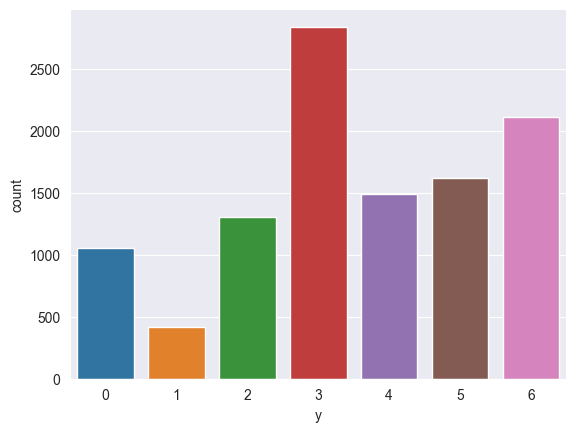

In [51]:
_ = sns.countplot(x='y', data=beanset)

# Rabdom Forest Classifier

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [84]:
np.random.seed(42)
X, y = make_circles(n_samples=2000, factor=0.1, noise=0.40, random_state=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
     

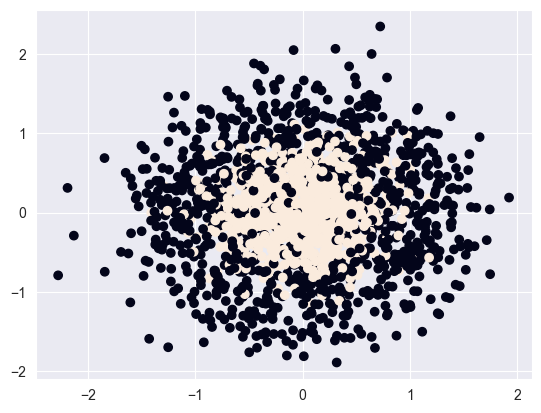

In [85]:
plt.scatter(X[:,0],X[:,1],c=y)  

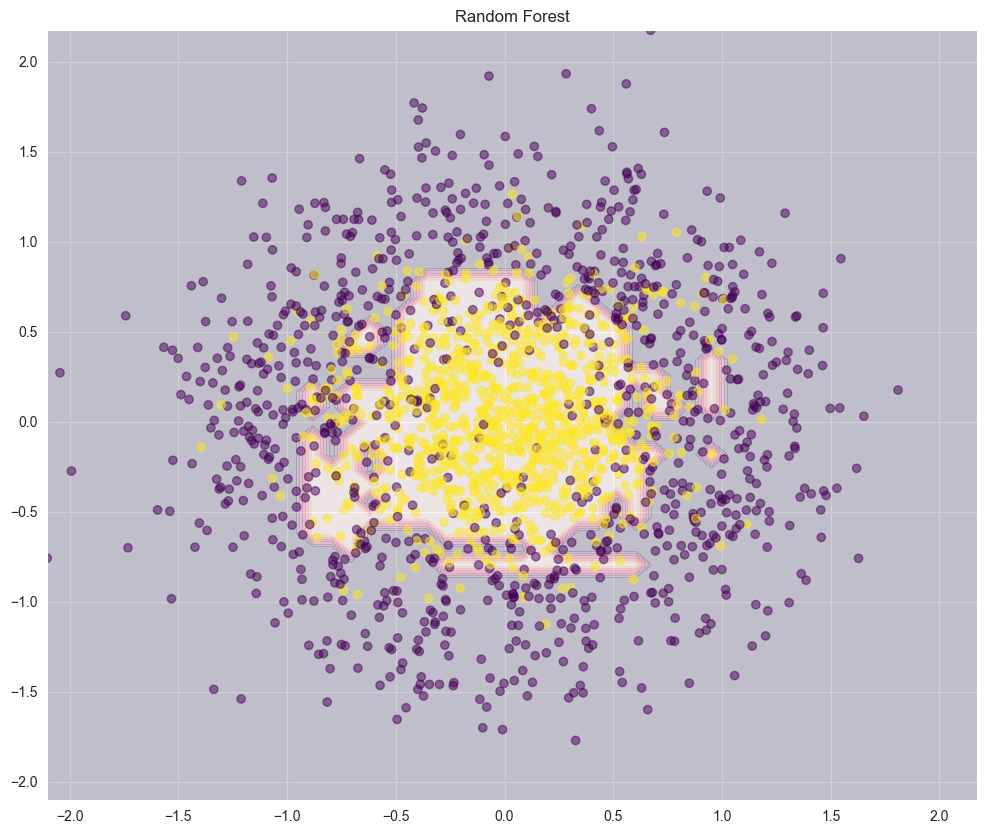

In [72]:
rf = RandomForestClassifier(n_estimators=400, random_state=42, max_features= 100)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 10))
x_range = np.linspace(X.min(), X.max(), 50)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.5)
plt.title("Random Forest")

plt.show()
     

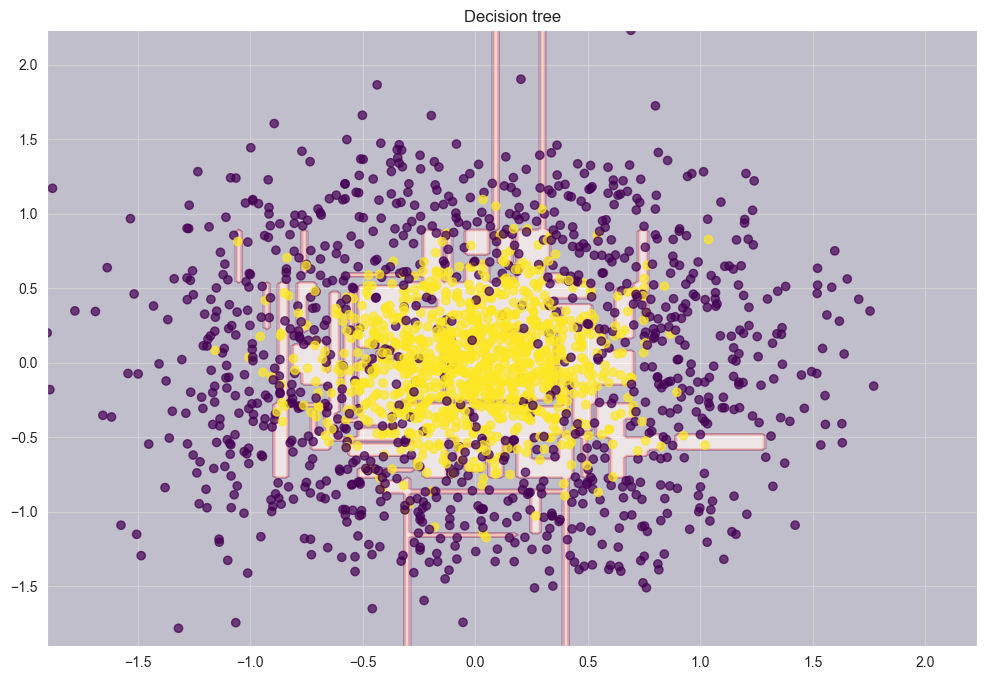

In [29]:
dtree = DecisionTreeClassifier(random_state=2000)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 200)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [42]:
fn_train = 250        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=fn_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
     

(-6.0, 6.0)

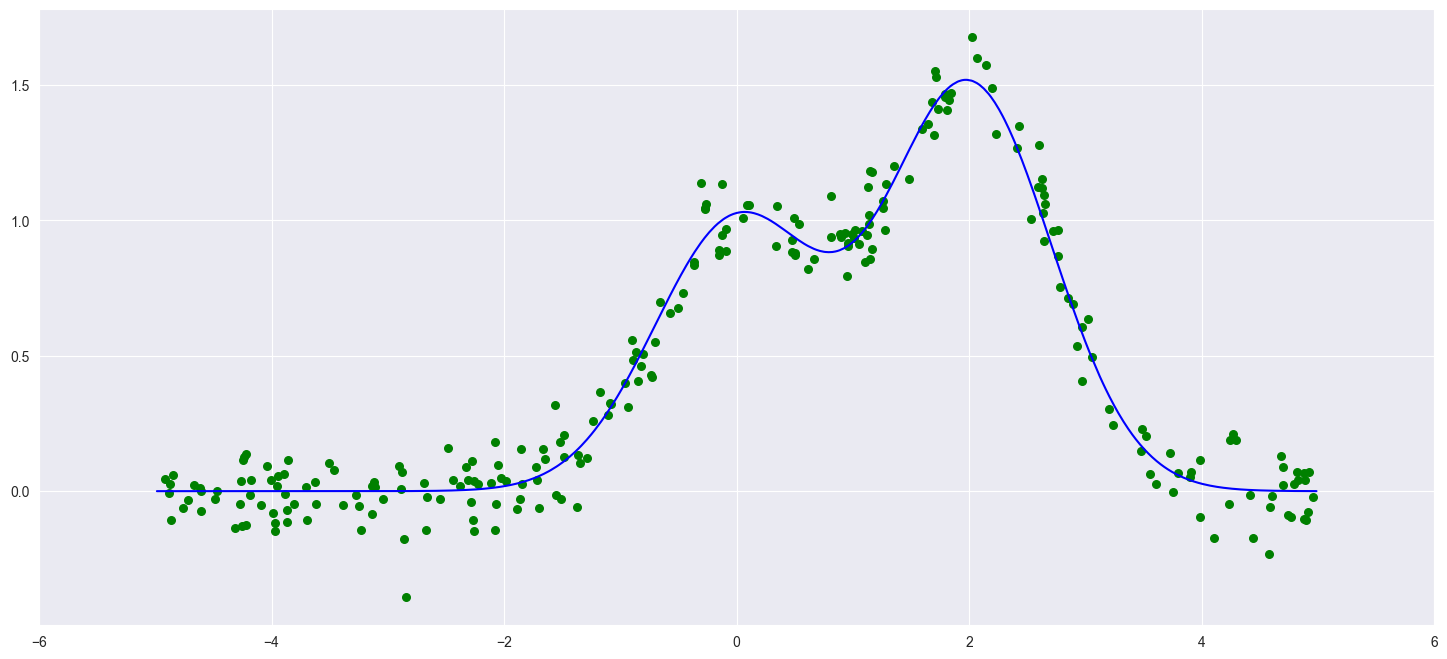

In [49]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="g", s=30)
plt.xlim([-6, 6])

Text(0.5, 1.0, 'Decision tree, MSE = 20.11')

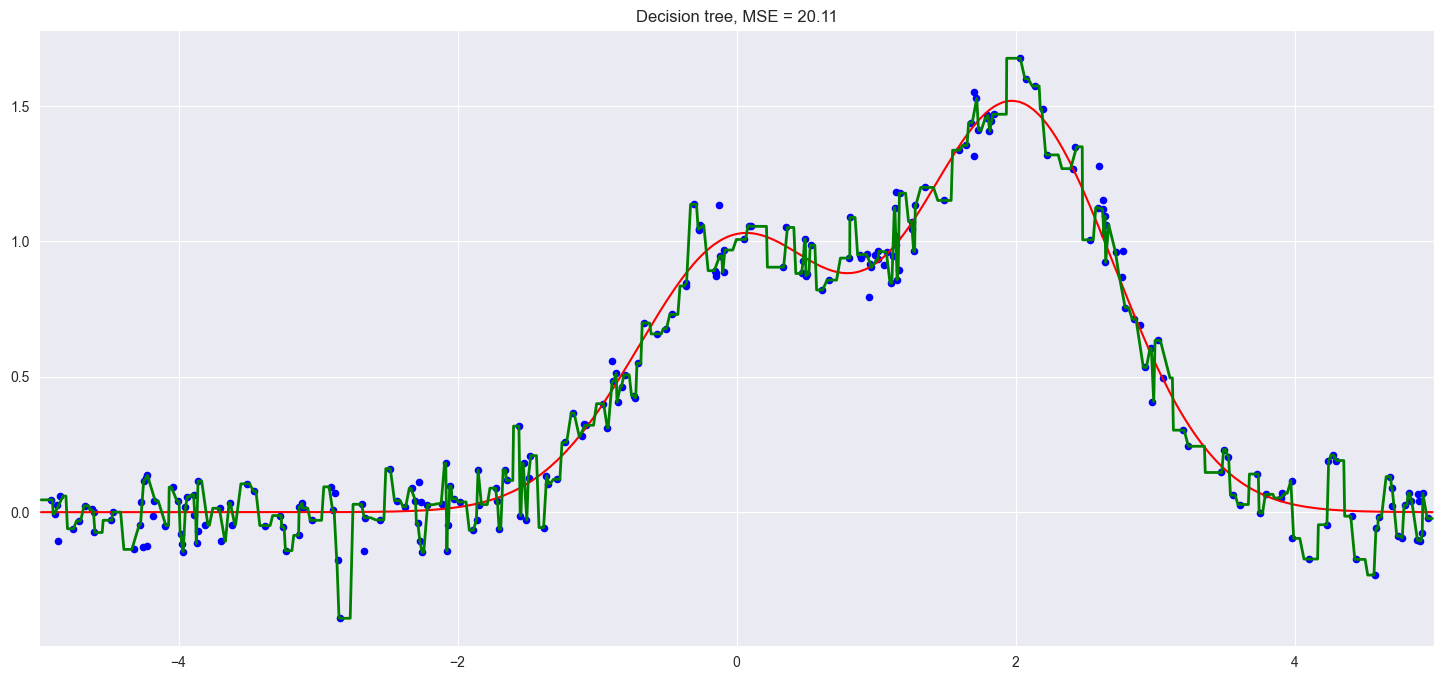

In [52]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

In [91]:
from sklearn.metrics import RocCurveDisplay